In [39]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from pylab import savefig

In [40]:
#import data from Ethan
all_beer_df = pd.read_csv("data_add_7param_cluster.csv", encoding="latin1")

#trim data to needed X colums
print(all_beer_df.columns)

#trim data to needed X colums
beer_char = all_beer_df[["ABV","IBU","Color"]]
beer_char_std = stats.zscore(beer_char)


#Set beer_char as X 
X=beer_char_std

Index(['BeerID', 'Name', 'Style', 'StyleID', 'OG', 'FG', 'ABV', 'IBU', 'Color',
       'BoilSize', 'BoilTime', 'Efficiency', 'ViewCount', 'BrewCount',
       'LastUpdated', 'Category', 'clusters_7param'],
      dtype='object')


In [41]:
# create a kmeans model of k = 13 and fit the model to the data
kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [42]:
# Use the data to predict the clusters and save the predictions as predict_clusters
predict_clusters = kmeans.predict(X)
labels = kmeans.labels_

In [43]:
# add cluster data columns
beer_char["clusters"] = labels
all_beer_df["clusters_3param"] = labels


C:\Users\brbal\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
# summarize cluster data
print(beer_char.groupby(["clusters"]).mean())

                ABV          IBU      Color
clusters                                   
0          7.862039   117.257900   9.612118
1          4.544629    24.373012   5.523386
2          8.525430    34.384613  13.087272
3          5.949753    40.530288  37.137086
4          7.716478   256.414588   9.589863
5          6.317252    68.693233   8.352109
6          7.325882   876.580588  14.548824
7         14.094050    40.486672  16.150555
8         26.980000  2790.405000  19.617500
9          5.378049    28.430611  19.073452
10        45.190000    15.056400  35.151200
11         5.924287    30.196656   6.897322
12         9.507225    70.618458  43.307211


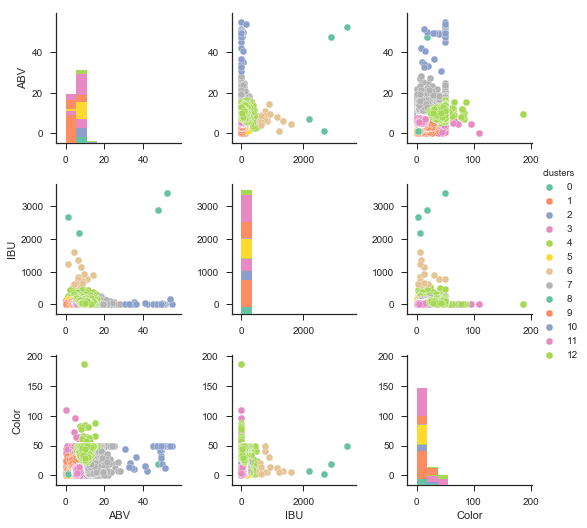

In [45]:
# visualize with scatterplot matrix
sns.set(style="ticks")
spm = sns.pairplot(beer_char, hue="clusters", vars=("ABV","IBU","Color"), palette="Set2")
spm.savefig('spm_3param.png')

In [46]:
# double check df columns
all_beer_df.head()

,BeerID,Name,Style,StyleID,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,ViewCount,BrewCount,LastUpdated,Category,clusters_7param,clusters_3param
0,1,Vanilla Cream Ale,Cream Ale,45,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0,150484.0,42.0,2016-06-14 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",8,11
1,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,1.054,1.014,5.36,19.97,5.94,28.39,75,70.0,95189.0,18.0,2017-07-30 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",8,11
2,43,Vanilla Caramel Cream Ale,Cream Ale,45,1.055,1.014,5.43,33.67,10.08,15.14,60,70.0,12216.0,7.0,2012-03-25 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",0,11
3,200,Cream of Three Crops,Cream Ale,45,1.044,1.012,4.15,18.13,2.56,17.03,90,75.0,5538.0,2.0,2012-07-16 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",8,1
4,244,Sleeman Cream Ale Clone,Cream Ale,45,1.055,1.015,5.22,19.73,4.74,28.40,60,70.0,4941.0,1.0,2012-11-14 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",0,1


In [38]:
# create the revised data csv
all_beer_df.to_csv("data_add_3param_cluster.csv", index=False)